### 精度検証

In [ ]:
from kineticEQ import BGK1DPlot

config_holo = {
    "solver": "implicit",
    "implicit_solver": "holo",
    "ho_iter": 64,
    "lo_iter": 64,
    "ho_tol": 1e-6,
    "lo_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_holo = BGK1DPlot(**config_holo)

In [ ]:
sim_holo.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_holo.save_benchmark_results(filename="holo_benchmark")

In [ ]:
config_implicit = {
    "solver": "implicit",
    "implicit_solver": "backend",
    "picard_iter": 4096,
    "picard_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_implicit = BGK1DPlot(**config_implicit)

In [ ]:
sim_implicit.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_implicit.save_benchmark_results(filename="implicit_benchmark")

In [ ]:
config_explicit = {
    "solver": "explicit",
    "explicit_solver": "backend",
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-7,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_explicit = BGK1DPlot(**config_explicit)

In [ ]:
sim_explicit.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_explicit.save_benchmark_results(filename="explicit_benchmark")

In [ ]:
# 結果表示
tmp = sim_holo.load_benchmark_results("holo_benchmark")
err = sim_holo.compute_error(tmp)
sim_holo.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

In [ ]:
tmp = sim_implicit.load_benchmark_results(filename="implicit_benchmark")
err = sim_implicit.compute_error(tmp)
sim_implicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

In [ ]:
tmp = sim_explicit.load_benchmark_results(filename="explicit_benchmark")
err = sim_explicit.compute_error(tmp)
sim_explicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

In [1]:
from kineticEQ import BGK1DPlot

config_cross_test = {
    "ho_iter": 4096,
    "lo_iter": 4096,
    "ho_tol": 1e-5,
    "lo_tol": 1e-5,
    "picard_iter": 4096,
    "picard_tol": 1e-5,

    "tau_tilde": 5e-8,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_cross = BGK1DPlot(**config_cross_test)

--- auto compile ---
--- auto compile complete ---
initiaze complete:
  solver: None
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-08
 ---- space ----
  space: nx=500, dx=0.0020, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=6, dt=0.0100, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


In [2]:
results = sim_cross.run_scheme_comparison_test(scheme_list=["explicit", "implicit", "holo"], scheme_delta_t_list=[5e-8, 5e-4, 5e-4])
sim_cross.save_benchmark_results(results, "cross_test.pkl")

--- compile cuSOLVER ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
/home/arlm/workspace/venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module gtsv_batch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- compile CUDA fused explicit backend ---


Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module explicit_fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output explicit_kernel.cuda.o.d -DTORCH_EXTENSION_NAME=explicit_fused -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_BFLOAT16_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --expt-relaxed-constexpr -gencode=arch=compute_80,code=sm_80 -gencode=arch=compute_86,code=sm_86 --compiler-options '-fPIC' -O3 -std=c++17 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/explicit_fused/explicit_kernel.cu -o explicit_kernel.cuda.o 
[2/3] c++ -MMD -MF expl

Loading extension module explicit_fused...
NoneType: None
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module implicit_fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output implicit_kernels.cuda.o.d -DTORCH_EXTENSION_NAME=implicit_fused -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_BFLOAT16_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --expt-relaxed-constexpr -gencode=arch=compute_80,code=sm_80 -gencode=arch=compute_86,code=sm_86 --compiler-options '-fPIC' -O3 -std=c++17 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/implicit_fused/implicit_kernels.cu -o implicit_kernels.cuda.o 
[2/3] c++ -MMD -MF i

Loading extension module implicit_fused...
NoneType: None
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module lo_blocktridiag...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- LO block-tridiag backend loaded ---
Running scheme comparison test with schemes: ['explicit', 'implicit', 'holo']
Time step sizes: [5e-08, 0.0005, 0.0005]
  Running explicit scheme (dt=5e-08)
--- explicit ---


Loading extension module lo_blocktridiag...
NoneType: None
Progress(explicit): 100%|██████████| 1000001/1000001 [02:10<00:00, 7655.34it/s]


  Running implicit scheme (dt=0.0005)
--- implicit ---


Progress(implicit): 100%|██████████| 101/101 [00:02<00:00, 34.99it/s]


  Running HOLO scheme (dt=0.0005)
--- HOLO ---


Progress(HOLO): 100%|██████████| 101/101 [00:01<00:00, 69.64it/s]

ベンチマーク結果を保存: cross_test.pkl  (2.32 MB)


'cross_test.pkl'

ベンチマーク結果を読み込み: cross_test.pkl  (meta: {'saved_at': '2025-12-04T09:22:54', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': None})


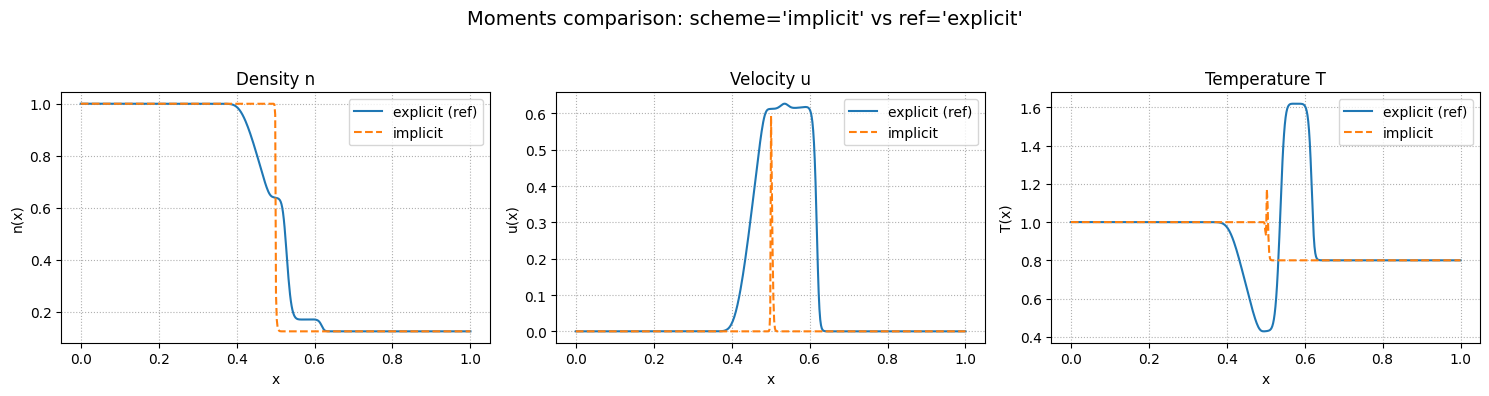

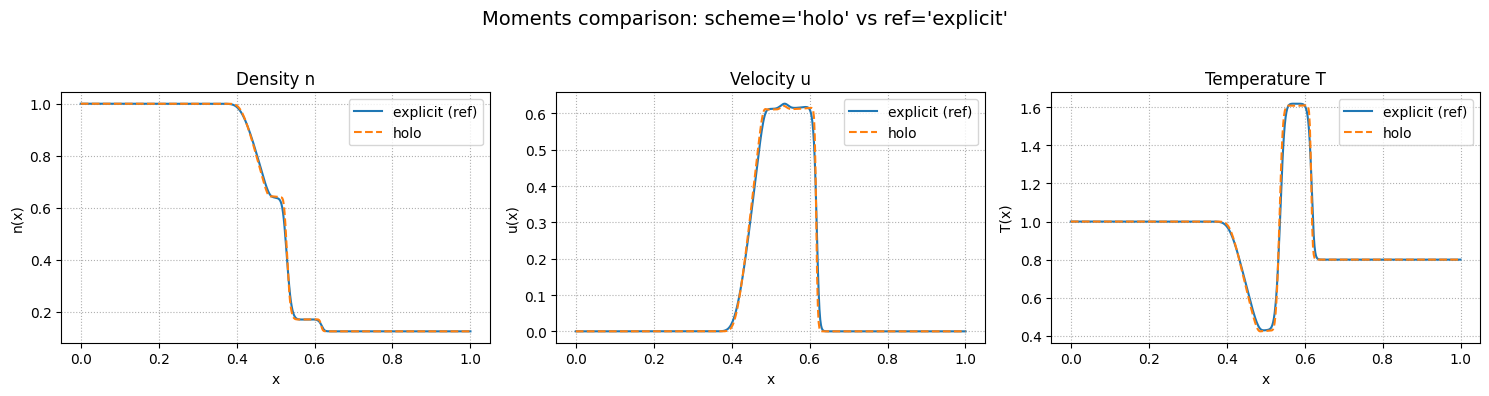

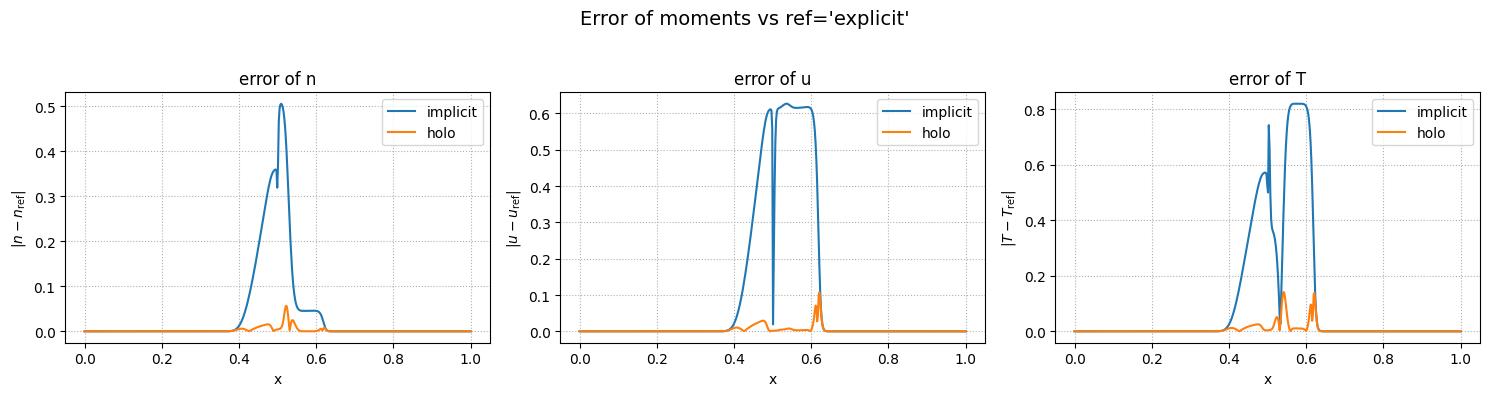

In [3]:
tmp = sim_cross.load_benchmark_results("cross_test.pkl")
sim_cross.plot_cross_scheme_results(tmp, ref_scheme="explicit")